In [1]:
%matplotlib inline
import yaml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib import pyplot

label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.color_cycle'] = ['#28598F', '#A68B05', '#DC3430', '#2AC241']

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def read_dos(dosfile):
    f = open(dosfile,'r')
    for file_length, l in enumerate(f.readlines()):
            line = l.strip()
            line_length = len(l.split())
    dos_data = np.zeros(shape=(file_length+1,line_length))
    f.close()
    f = open(dosfile,'r')
    for i, l in enumerate(f.readlines()):
        line = l.strip()
        line = line.split()
        for j in range(line_length):
            dos_data[i,j] = line[j]
    f.close()
    return dos_data

def dos_contribs(linker1,linker2,metals):
    contribs = np.zeros(shape=(len(linker1)))
    for i in range(1,len(linker1)):
        if metals[i]+linker1[i]+linker2[i] > 0.25:
            contribs[i] = metals[i]/(metals[i]+linker1[i]+linker2[i])
        else:
            contribs[i] = 0.
    return contribs

def total_dos(dos_a,dos_b,dos_c):
    total_dos = np.zeros(shape=(len(dos_a)))
    for j, val in enumerate(dos_a):
        total_dos[j] = val + dos_b[j] + dos_c[j]
    total_dos = [val/max(total_dos) for val in total_dos]
    return total_dos

In [3]:
vacuum = 3.32
n_dos_7 = read_dos('ZIF-7/N_DOS')
n_dos_7_tot = [sum(point[1:]) for point in n_dos_7]
n_dos_7[:,0] = [val - vacuum -0.5 for val in n_dos_7[:,0]]

c_dos_7 = read_dos('ZIF-7/C_DOS')
c_dos_7_tot = [sum(point[1:]) for point in c_dos_7]
c_dos_7[:,0] = [val - vacuum - 0.5 for val in c_dos_7[:,0]]

zn_dos_7 = read_dos('ZIF-7/Zn_DOS')
zn_dos_7_tot = [sum(point[1:]) for point in zn_dos_7]
zn_dos_7[:,0] = [val - vacuum - 0.5 for val in zn_dos_7[:,0]]

vacuum = 2.37
n_dos_8 = read_dos('ZIF-8/N_DOS')
n_dos_8_tot = [sum(point[1:]) for point in n_dos_8]
n_dos_8[:,0] = [val - vacuum - 0.5 for val in n_dos_8[:,0]]

c_dos_8 = read_dos('ZIF-8/C_DOS')
c_dos_8_tot = [sum(point[1:]) for point in c_dos_8]
c_dos_8[:,0] = [val - vacuum - 0.5 for val in c_dos_8[:,0]]

zn_dos_8 = read_dos('ZIF-8/Zn_DOS')
zn_dos_8_tot = [sum(point[1:]) for point in zn_dos_8]
zn_dos_8[:,0] = [val - vacuum - 0.5 for val in zn_dos_8[:,0]]

vacuum = 3.55
n_dos_9 = read_dos('ZIF-9/N_DOS')
n_dos_9_tot = [sum(point[1:]) for point in n_dos_9]
n_dos_9[:,0] = [val - vacuum - 0.5 for val in n_dos_9[:,0]]

c_dos_9 = read_dos('ZIF-9/C_DOS')
c_dos_9_tot = [sum(point[1:]) for point in c_dos_9]
c_dos_9[:,0] = [val - vacuum - 0.5 for val in c_dos_9[:,0]]

co_dos_9 = read_dos('ZIF-9/Co_DOS')
co_dos_9_tot = [sum(point[1:]) for point in co_dos_9]
co_dos_9[:,0] = [val - vacuum - 0.5 for val in co_dos_9[:,0]]

vacuum = 2.70
n_dos_67 = read_dos('ZIF-67/N_DOS')
n_dos_67_tot = [sum(point[1:]) for point in n_dos_67]
n_dos_67[:,0] = [val - vacuum - 0.5 for val in n_dos_67[:,0]]

c_dos_67 = read_dos('ZIF-67/C_DOS')
c_dos_67_tot = [sum(point[1:]) for point in c_dos_67]
c_dos_67[:,0] = [val - vacuum - 0.5 for val in c_dos_67[:,0]]

co_dos_67 = read_dos('ZIF-67/Co_DOS')
co_dos_67_tot = [sum(point[1:]) for point in co_dos_67]
co_dos_67[:,0] = [val - vacuum - 0.5 for val in co_dos_67[:,0]]

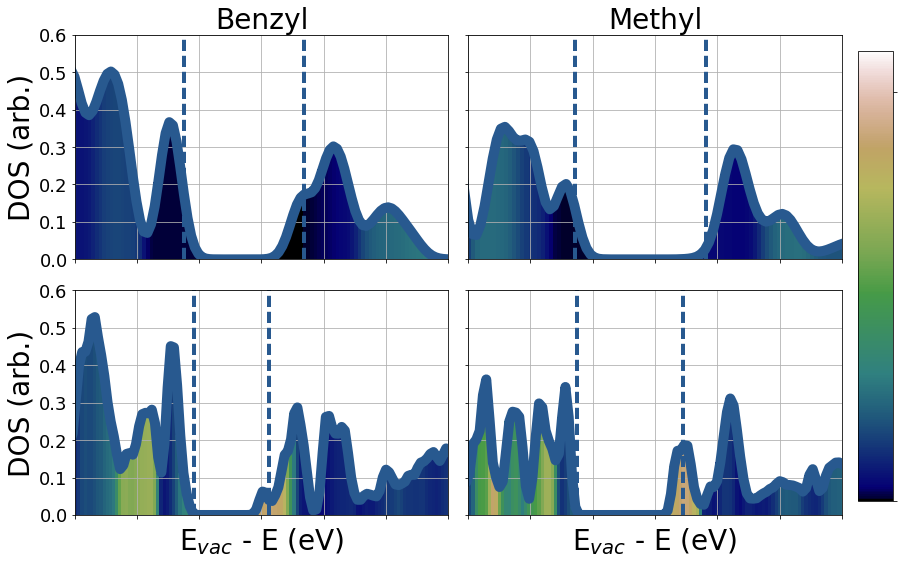

In [8]:
f, ax = plt.subplots(2, 2, sharey=True)
f.set_size_inches(12,8)

lines = 10
fs = 28
w = 0.2
jet = cm = plt.get_cmap('gist_earth') 
cNorm  = colors.Normalize(vmin=0, vmax=1.1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#################################################################################
my_colors = []
total_dos_7 = total_dos(n_dos_7_tot,c_dos_7_tot,zn_dos_7_tot)
dos_7_contributions = dos_contribs(n_dos_7_tot,c_dos_7_tot,zn_dos_7_tot)
for m in dos_7_contributions:
    my_colors.append(scalarMap.to_rgba(m))
    
ax[0,0].bar(n_dos_7[:,0],total_dos_7[:],color=my_colors, edgecolor = "none",width=w)
ax[0,0].plot(n_dos_7[:,0]+0.1,total_dos_7[:],lw=lines)
ax[0,0].axvline(-5.61,ls='dashed',linewidth=4)
ax[0,0].axvline(-0.79,ls='dashed',linewidth=4)
ax[0,0].set_title('Benzyl',fontsize=fs)
ax[0,0].set_ylabel('DOS (arb.)',fontsize=fs)
#################################################################################
my_colors = []
total_dos_8 = total_dos(n_dos_8_tot,c_dos_8_tot,zn_dos_8_tot)
dos_8_contributions = dos_contribs(n_dos_8_tot,c_dos_8_tot,zn_dos_8_tot)

for m in dos_8_contributions:
    my_colors.append(scalarMap.to_rgba(m))
    
ax[0,1].bar(n_dos_8[:,0],total_dos_8[:],color=my_colors, edgecolor = "none",width=w)
ax[0,1].plot(n_dos_8[:,0]+0.1,total_dos_8[:],lw=lines)
ax[0,1].axvline(-5.73,ls='dashed',linewidth=4)
ax[0,1].axvline(-0.44,ls='dashed',linewidth=4)
ax[0,1].set_title('Methyl',fontsize=fs)
#################################################################################
my_colors = []
total_dos_9 = total_dos(n_dos_9_tot,c_dos_9_tot,co_dos_9_tot)
dos_9_contributions = dos_contribs(n_dos_9_tot,c_dos_9_tot,co_dos_9_tot)
total_dos_9 = [t*0.75 for t in total_dos_9]

for m in dos_9_contributions:
    my_colors.append(scalarMap.to_rgba(m))
    
ax[1,0].bar(n_dos_9[:,0],total_dos_9[:],color=my_colors, edgecolor = "none",width=w)
ax[1,0].plot(n_dos_9[:,0]+0.1,total_dos_9[:],lw=lines)
ax[1,0].axvline(-5.21,ls='dashed',linewidth=4)
ax[1,0].axvline(-2.20,ls='dashed',linewidth=4)
ax[1,0].set_xlabel('E$_{vac}$ - E (eV)',fontsize=fs)
ax[1,0].set_ylabel('DOS (arb.)',fontsize=fs)

#################################################################################
my_colors = []
total_dos_67 = total_dos(n_dos_67_tot,c_dos_67_tot,co_dos_67_tot)
dos_67_contributions = dos_contribs(n_dos_67_tot,c_dos_67_tot,co_dos_67_tot)
total_dos_67 = [t*0.75 for t in total_dos_67]

for m in dos_67_contributions:
    my_colors.append(scalarMap.to_rgba(m))
    
ax[1,1].bar(n_dos_67[:,0],total_dos_67[:],color=my_colors, edgecolor = "none",width=w)
ax[1,1].plot(n_dos_67[:,0]+0.1,total_dos_67[:],lw=lines)
ax[1,1].axvline(-5.62,ls='dashed',linewidth=4)
ax[1,1].axvline(-1.38,ls='dashed',linewidth=4)
ax[1,1].set_xlabel('E$_{vac}$ - E (eV)',fontsize=fs)

#################################################################################
for i in range(2):
    for j in range(2):
        ax[i,j].set_ylim(0,0.6)
        ax[i,j].set_xlim(-10,5)
        ax[i,j].grid(True)
        ax[i,j].set_xticklabels([])

ax1 = f.add_axes([1.0, 0.12, 0.04, 0.78])
cmap = mpl.cm.gist_earth
norm = mpl.colors.Normalize(vmin=0, vmax=0.55)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=cNorm)
#tick_locator = mpl.ticker.MaxNLocator(nbins=1)
#cb1.locator = tick_locator
#cb1.update_ticks()
#cb1.ax.set_xticklabels(['A','B'])
#cb1.set_ticklabels(['Ligand','Metal'])
#cb1.set_ticklabels(['1','2','3'])
cb1.set_ticks([0,1.0])
cb1.set_ticklabels(['', ''])
#cb1.set_label('Percentage metal character',fontsize=18)

plt.tight_layout()
f.savefig('BandEdges.png')

(-4, 4)

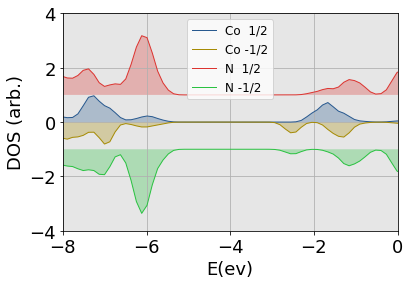

In [5]:
f, ax = plt.subplots(1, 1, sharey=True)
inv_total_dos_9 = [-t for t in total_dos_9]
f.set_size_inches(6,4)
ax.plot(co_dos_9[:,0],co_dos_9[:,5]/12,lw=1,label="Co  1/2")
ax.plot(co_dos_9[:,0],-co_dos_9[:,6]/12,lw=1,label="Co -1/2")

ax.plot(n_dos_9[:,0],n_dos_9[:,3]/2+1,lw=1,label="N  1/2")
ax.plot(n_dos_9[:,0],-n_dos_9[:,4]/2-1,lw=1,label="N -1/2")
#ax.plot(co_dos_67[:,0],total_dos_67[:])
ax.legend(loc='upper center')
#ax.fill_between(co_dos_9[:,0],0,total_dos_9[:],color='r',alpha=0.3)
#ax.fill_between(co_dos_9[:,0],0,inv_total_dos_9[:],color='r',alpha=0.3)
ax.fill_between(co_dos_9[:,0],0,co_dos_9[:,5]/12,alpha=0.3)
ax.fill_between(co_dos_9[:,0],0,-co_dos_9[:,6]/12,alpha=0.3)
ax.fill_between(co_dos_9[:,0],1,n_dos_9[:,3]/2+1,alpha=0.3)
ax.fill_between(co_dos_9[:,0],-1,-n_dos_9[:,4]/2-1,alpha=0.3)
ax.grid(True)
ax.set_xlim(-8,0)
f.savefig('spin_dos_9.png')
ax.set_xlabel('E(ev)',fontsize=18)
ax.set_ylabel('DOS (arb.)',fontsize=18)
ax.set_facecolor((0.9,0.9,0.9))
ax.set_ylim(-4,4)

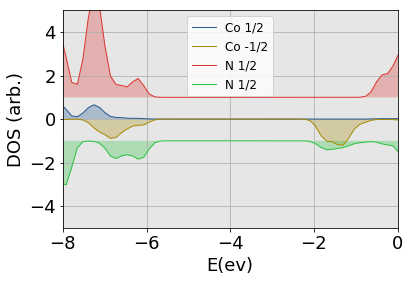

In [6]:
f, ax = plt.subplots(1, 1, sharey=True)
inv_total_dos_67 = [-t for t in total_dos_67]
f.set_size_inches(6,4)
ax.plot(co_dos_67[:,0],co_dos_67[:,5]/12,lw=1,label="Co 1/2")
ax.plot(co_dos_67[:,0],-co_dos_67[:,6]/12,lw=1,label="Co -1/2")

ax.plot(n_dos_67[:,0],n_dos_67[:,3]/2+1,lw=1,label="N 1/2")
ax.plot(n_dos_67[:,0],-n_dos_67[:,4]/2-1,lw=1,label="N 1/2")
#ax.plot(co_dos_67[:,0],total_dos_67[:])
ax.legend(loc='upper center')
#ax.fill_between(co_dos_67[:,0],0,total_dos_67[:],color='r',alpha=0.3)
#ax.fill_between(co_dos_67[:,0],0,inv_total_dos_67[:],color='r',alpha=0.3)

ax.fill_between(co_dos_67[:,0],0,co_dos_67[:,5]/12,alpha=0.3)
ax.fill_between(co_dos_67[:,0],0,-co_dos_67[:,6]/12,alpha=0.3)
ax.fill_between(co_dos_67[:,0],1,n_dos_67[:,3]/2+1,alpha=0.3)
ax.fill_between(co_dos_67[:,0],-1,-n_dos_67[:,4]/2-1,alpha=0.3)

ax.set_facecolor((0.9,0.9,0.9))
ax.grid(True)
ax.set_xlim(-8,0)
ax.set_ylim(-5,5)
ax.set_xlabel('E(ev)',fontsize=18)
ax.set_ylabel('DOS (arb.)',fontsize=18)
f.savefig('spin_dos_67.png')